# Import modules

In [1]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

import celltypist
from celltypist import models

import session_info

In [2]:
sc.settings.set_figure_params(dpi=120, color_map = 'RdPu',)

In [3]:
session_info.show()

# Read in immune raw data

In [4]:
!ls /nfs/team205/heart/anndata_objects/Foetal/Immune/

C97_index.csv
RNA_foetal_raw_immune_16Feb2023.h5ad
RNA_foetal_raw_Lymphoid_16Feb2023.h5ad
RNA_foetal_raw_Lymphoid_16Feb2023.obs.csv
RNA_foetal_raw_Myeloid_16Feb2023.h5ad
RNA_foetal_raw_Myeloid_16Feb2023.obs.csv


In [6]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_immune_16Feb2023.h5ad')
adata

AnnData object with n_obs × n_vars = 41881 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', '_scvi_labels', '2Jan_coarse_grain', '2Jan_mid_grain', '2Jan_fine_grain', 'leiden_scVI', 'FACSgate', 'sex', 'week', 'trimester', 'cell_type2'
    var: 'gene_name_scRNA-0', 'gene_id'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_ext

In [7]:
adata.X.data[:10]

array([1., 2., 1., 1., 1., 2., 2., 5., 2., 2.], dtype=float32)

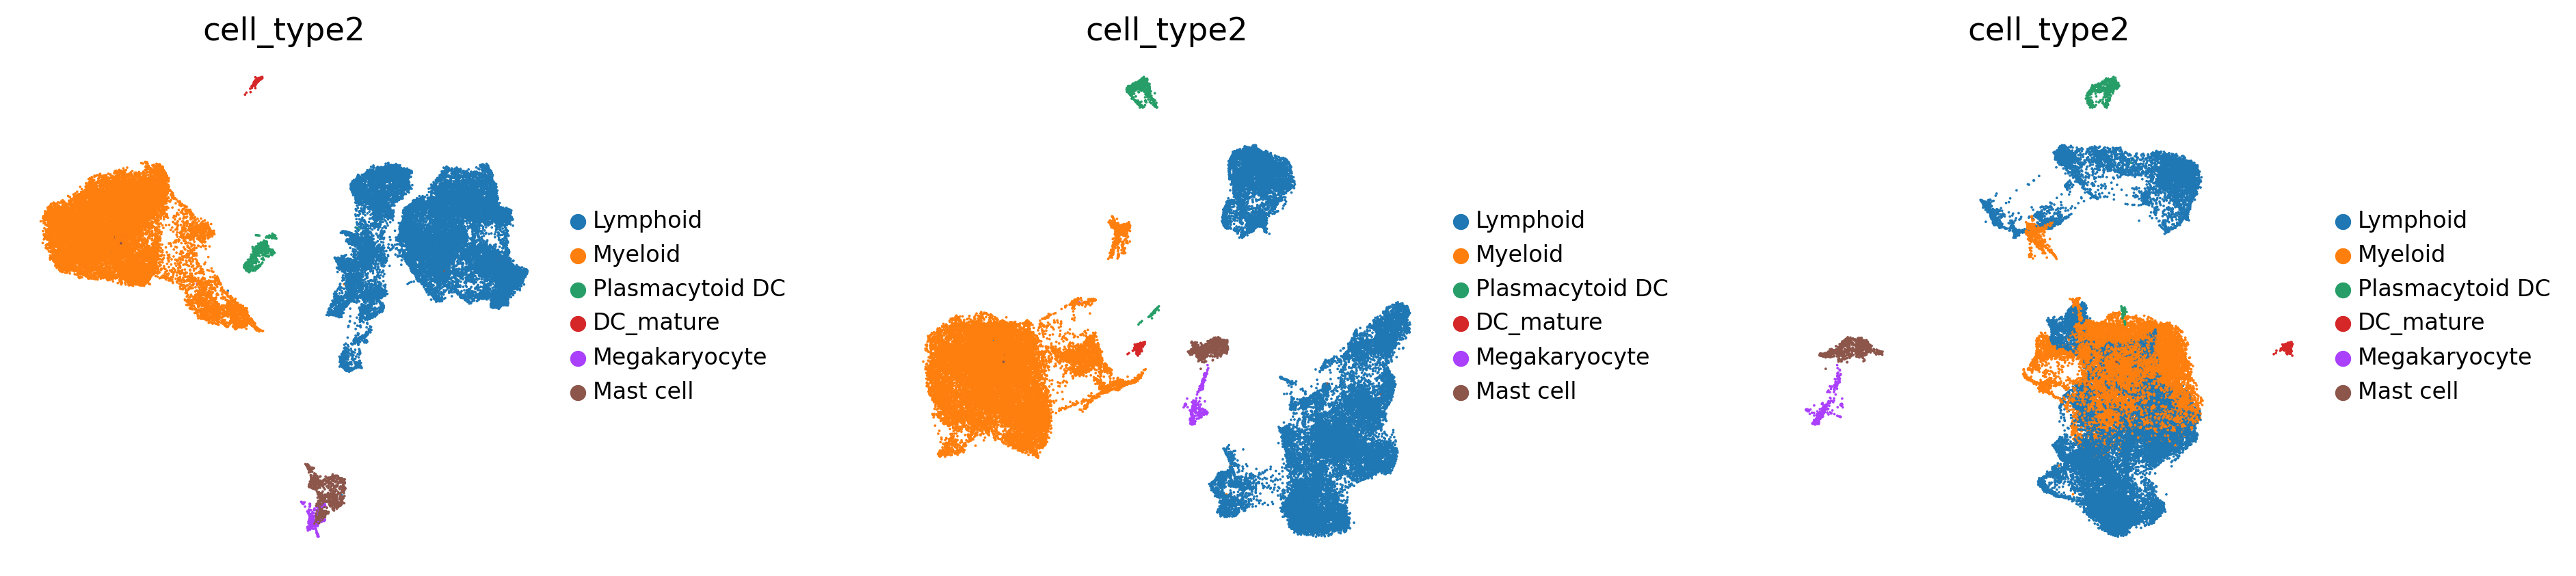

In [10]:
sc.pl.umap(adata, color=['cell_type2'], size=5, legend_fontsize=10, frameon=False, components='all', wspace=0.5)

# Read in myeloid and lymphoid objects for the annotation

In [ ]:
!ls /nfs/team205/heart/anndata_objects/Foetal/Immune/

In [16]:
lymph = pd.read_csv('/nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_Lymphoid_16Feb2023.obs.csv',index_col=0)
lymph.head()

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


latent_RT_efficiency  \
barcode                                                      
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1              3.109560   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1              3.181446   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1              2.920244   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1              2.670159   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1              2.611420   

                                      latent_cell_probability  latent_scale  \
barcode                                                                       
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1                 0.999991  10201.502930   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1                 0.999989  10217.305664   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1                 0.999989   9583.051758   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1                 0.999989   8767.724609   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1                 0.999987   8768.142578   

                                               sangerID combinedID donor  \
barcode                                                                    
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1  BHF_F_Hea10402917         na   C86   

                                     donor_type region region_finest    age  \
barcode                                                                       
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1         na  Heart         Heart  10W5D   

                                      ... 2Jan_coarse_grain 2Jan_mid_grain  \
barcode                               ...                                    
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1  ...        Leukocytes  LymphoidCells   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1  ...        Leukocytes  LymphoidCells   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1  ...        Leukocytes   MyeloidCells   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1  ...               NaN            NaN   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1  ...        Leukocytes  LymphoidCells   

                                          2Jan_fine_grain leiden_scVI  \
barcode                                                                 
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1  InnateLymphoidCells           5   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1               BCells          17   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1      MonocytesMPOpos           9   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1                  NaN          13   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1              B1Cells          19   

                                     FACSgate   sex  week       trimester  \
barcode                                                                     
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_ATAACGCTCCACGACG-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_GCTGGGTGTGCGGTAA-1  CD45pos  male   10W  firsttrimester   

                                      cell_type2  cell_type3  
barcode                                                       
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1    Lymphoid         ILC  
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1    Lymphoid           B  
BHF_F_Hea10402917_ATAACGCTCCACGACG-1    Lymphoid       CD4+T  
BHF_F_Hea10402917_CACAGTAGTATAGGGC-1    Lymphoid

In [12]:
myelo = pd.read_csv('/nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_Myeloid_16Feb2023.obs.csv',index_col=0)
myelo.head()

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


latent_RT_efficiency  \
barcode                                                      
BHF_F_Hea10402917_CTGCCTACACACAGAG-1              3.039951   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1              2.736971   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1              2.721002   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1              2.461219   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1              2.363686   

                                      latent_cell_probability  latent_scale  \
barcode                                                                       
BHF_F_Hea10402917_CTGCCTACACACAGAG-1                 0.999992  11144.482422   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1                 0.999983   7943.241699   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1                 0.999977   8796.661133   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1                 0.999979   7610.175293   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1                 0.999982   7628.370117   

                                               sangerID combinedID donor  \
barcode                                                                    
BHF_F_Hea10402917_CTGCCTACACACAGAG-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1  BHF_F_Hea10402917         na   C86   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1  BHF_F_Hea10402917         na   C86   

                                     donor_type region region_finest    age  \
barcode                                                                       
BHF_F_Hea10402917_CTGCCTACACACAGAG-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1         na  Heart         Heart  10W5D   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1         na  Heart         Heart  10W5D   

                                      ... 2Jan_coarse_grain 2Jan_mid_grain  \
barcode                               ...                                    
BHF_F_Hea10402917_CTGCCTACACACAGAG-1  ...        Leukocytes   MyeloidCells   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1  ...        Leukocytes   MyeloidCells   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1  ...        Leukocytes   MyeloidCells   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1  ...        Leukocytes   MyeloidCells   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1  ...        Leukocytes   MyeloidCells   

                                          2Jan_fine_grain leiden_scVI  \
barcode                                                                 
BHF_F_Hea10402917_CTGCCTACACACAGAG-1  MacrophagesLYVE1pos           4   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1      MonocytesMPOpos          17   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1            Monocytes          10   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1            MastCells          16   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1            MastCells          17   

                                     FACSgate   sex  week       trimester  \
barcode                                                                     
BHF_F_Hea10402917_CTGCCTACACACAGAG-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_CGTAGGCGTTGTACAC-1  CD45pos  male   10W  firsttrimester   
BHF_F_Hea10402917_CACATAGCATCCGCGA-1  CD45pos  male   10W  firsttrimester   

                                      cell_type2         cell_type3  
barcode                                                              
BHF_F_Hea10402917_CTGCCTACACACAGAG-1     Myeloid  MP_LYVE1+_cycling  
BHF_F_Hea10402917_TGGCCAGTCATGCTCC-1     Myeloid            Doublet  
BHF_F_Hea10402917_TACCTATCAGCTGTGC-1     Myeloid               Mono  
BHF_F_Hea1040

# Add annotation

## new_fine_grain

In [17]:
adata.obs['new_fine_grain'] = adata.obs['cell_type2'].astype('str')
adata.obs.loc[lymph.index,'new_fine_grain'] = lymph['cell_type3'].astype('str')
adata.obs.loc[myelo.index,'new_fine_grain'] = myelo['cell_type3'].astype('str')
adata.obs['new_fine_grain'].value_counts()

MP_LYVE1+            9748
CD4+T                5206
B_MS4A1+             3722
NK                   2437
CD8+T                2121
CD4+Treg             1940
MP_LYVE1+ATF3+       1844
B                    1666
MP_LYVE1+_cycling    1650
MP_CX3CR1+           1648
ILC                  1639
T_cycling             912
Mono                  900
Mast cell             866
Bpro                  850
B_cycling             843
Mono-derived          661
DC1                   609
Plasmacytoid DC       608
Doublet               583
MP_TIMD4+             470
Mono_MPO+             414
Megakaryocyte         360
DC_mature             184
Name: new_fine_grain, dtype: int64

... storing 'new_fine_grain' as categorical


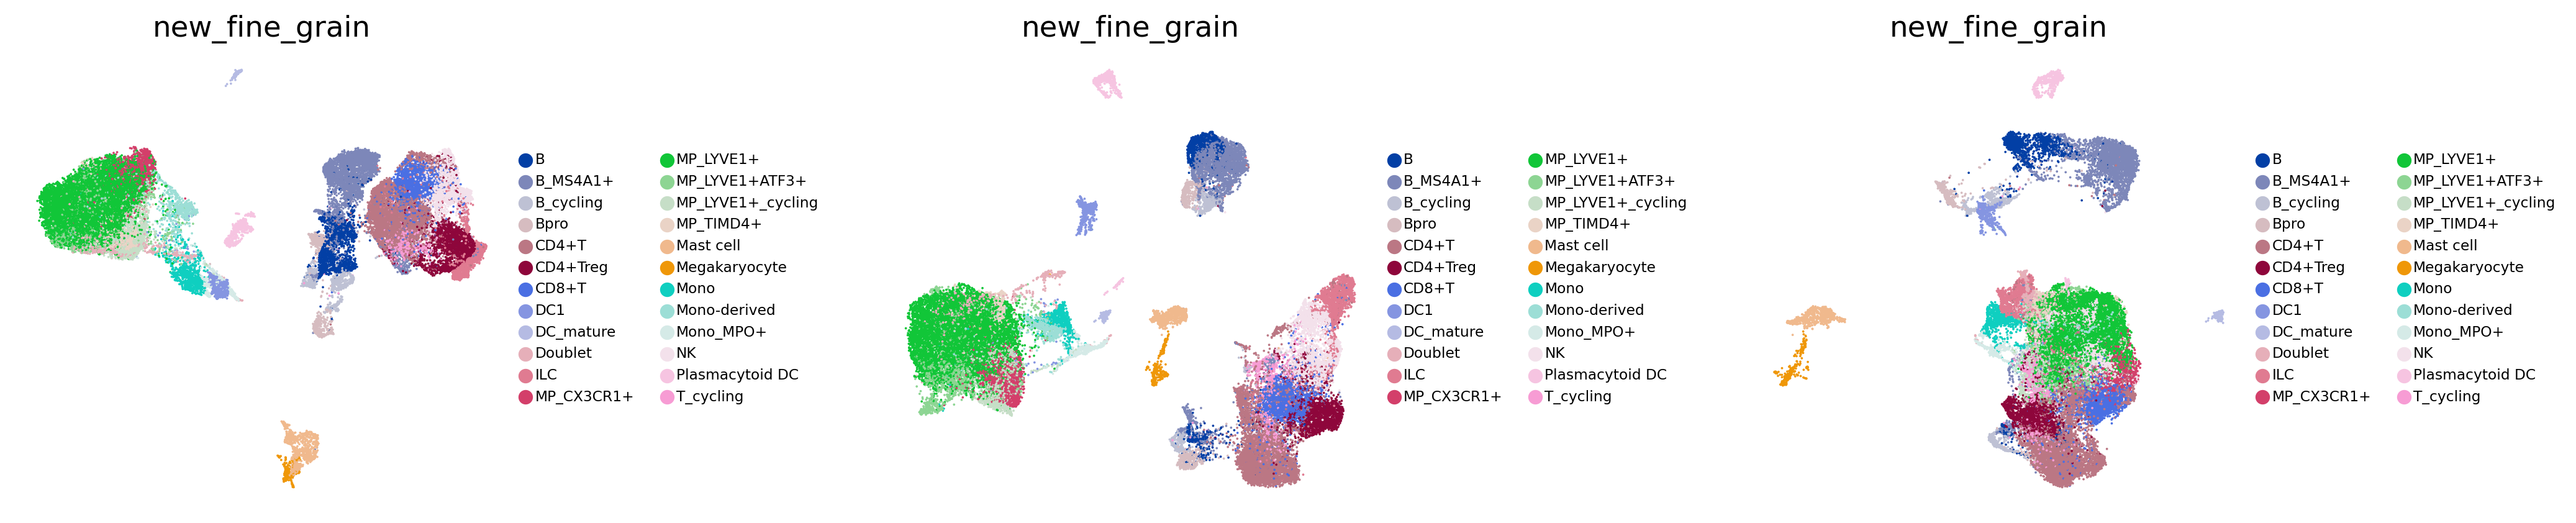

In [18]:
sc.pl.umap(adata, color=['new_fine_grain'], size=5, legend_fontsize=7, frameon=False, components='all', wspace=0.6)

In [19]:
set(adata.obs['new_fine_grain'])

{'B',
 'B_MS4A1+',
 'B_cycling',
 'Bpro',
 'CD4+T',
 'CD4+Treg',
 'CD8+T',
 'DC1',
 'DC_mature',
 'Doublet',
 'ILC',
 'MP_CX3CR1+',
 'MP_LYVE1+',
 'MP_LYVE1+ATF3+',
 'MP_LYVE1+_cycling',
 'MP_TIMD4+',
 'Mast cell',
 'Megakaryocyte',
 'Mono',
 'Mono-derived',
 'Mono_MPO+',
 'NK',
 'Plasmacytoid DC',
 'T_cycling'}

## new_mid_grain

In [22]:
fine2mid = {
    'Mono':'MyeloidCells', 
    'Mono_MPO+':'MyeloidCells', 
    'Mono-derived':'MyeloidCells',
    'MP_CX3CR1+':'MyeloidCells',
    # 'MP_TREM2+':'MyeloidCells', 
    'MP_TIMD4+':'MyeloidCells',
    'MP_LYVE1+':'MyeloidCells',
    # 'MP_LYVE1+JUN+':'MyeloidCells',
    'MP_LYVE1+ATF3+':'MyeloidCells',
    'MP_LYVE1+_cycling':'MyeloidCells',
    'DC1':'MyeloidCells',
    'DC_mature':'MyeloidCells',
    'Plasmacytoid DC':'MyeloidCells',
    'Mast cell':'MyeloidCells',
    'Megakaryocyte':'MyeloidCells',
    'CD4+T':'LymphoidCells',
    'CD4+Treg':'LymphoidCells',
    'CD8+T':'LymphoidCells',
    'NK':'LymphoidCells',
    'ILC':'LymphoidCells',
    'T_cycling':'LymphoidCells',
    'Bpro':'LymphoidCells',
    'B':'LymphoidCells',
    'B_MS4A1+':'LymphoidCells',
    'B_cycling':'LymphoidCells',
    'Doublet':'Doublet',
}

adata.obs['new_mid_grain']=adata.obs['new_fine_grain'].copy()
adata.obs.replace({'new_mid_grain':fine2mid},inplace=True)
pd.crosstab(adata.obs['new_fine_grain'],adata.obs['new_mid_grain'])

new_mid_grain      Doublet  LymphoidCells  MyeloidCells
new_fine_grain                                         
B                        0           1666             0
B_MS4A1+                 0           3722             0
B_cycling                0            843             0
Bpro                     0            850             0
CD4+T                    0           5206             0
CD4+Treg                 0           1940             0
CD8+T                    0           2121             0
DC1                      0              0           609
DC_mature                0              0           184
Doublet                583              0             0
ILC                      0           1639             0
MP_CX3CR1+               0              0          1648
MP_LYVE1+                0              0          9748
MP_LYVE1+ATF3+           0              0          1844
MP_LYVE1+_cycling        0              0          1650
MP_TIMD4+                0              0           470
Mast cell                0              0           866
Megakaryocyte            0              0           360
Mono                     0              0           900
Mono-derived             0              0           661
Mono_MPO+                0              0           414
NK                       0           2437             0
Plasmacytoid DC          0              0           608
T_cycling                0            912             0

## Set category

In [23]:
adata.obs['new_mid_grain']=adata.obs['new_mid_grain'].astype('category')
adata.obs['new_mid_grain'].cat.reorder_categories([
   'MyeloidCells', 
    'LymphoidCells',
    'Doublet',
     ], inplace=True)

adata.obs['new_fine_grain']=adata.obs['new_fine_grain'].astype('category')
adata.obs['new_fine_grain'].cat.reorder_categories(list(fine2mid.keys()), inplace=True)

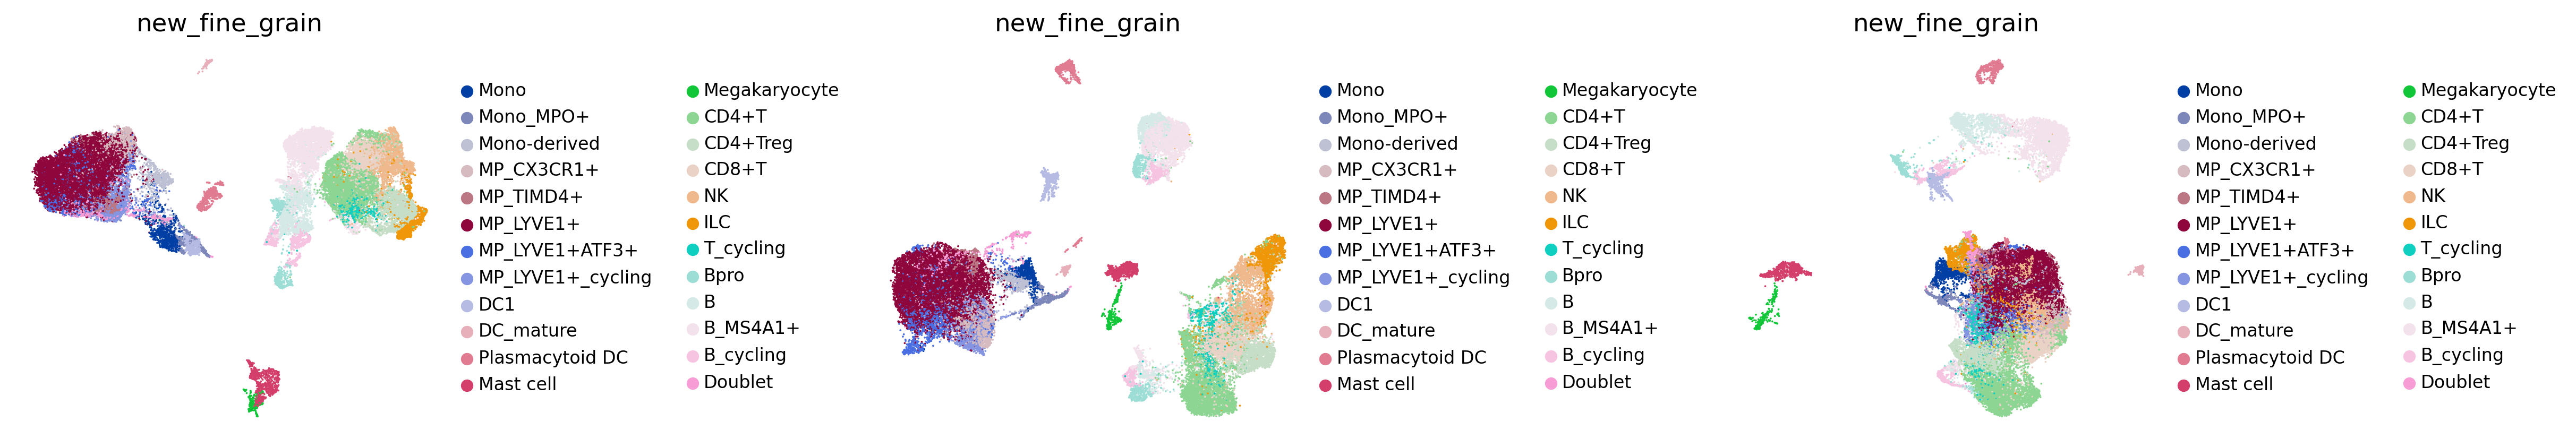

In [53]:
sc.pl.umap(adata, color=['new_fine_grain'], size=5, legend_fontsize=10, frameon=False, components='all', wspace=0.8)

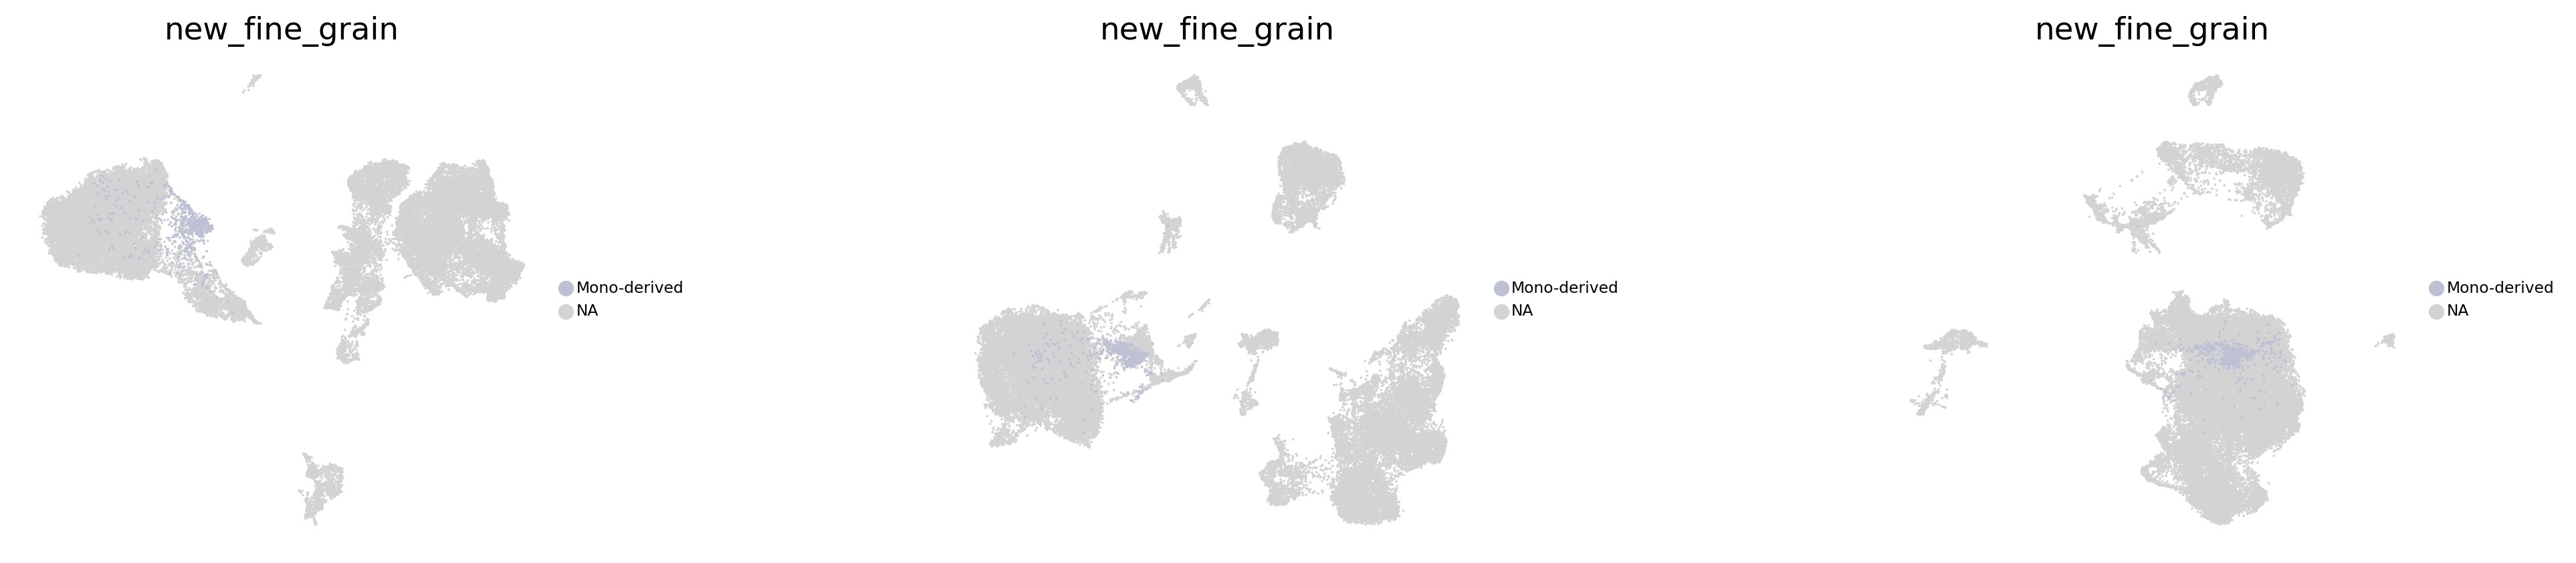

In [26]:
sc.pl.umap(adata, color=['new_fine_grain'], groups='Mono-derived',size=5, legend_fontsize=7, frameon=False, components='all', wspace=0.6)

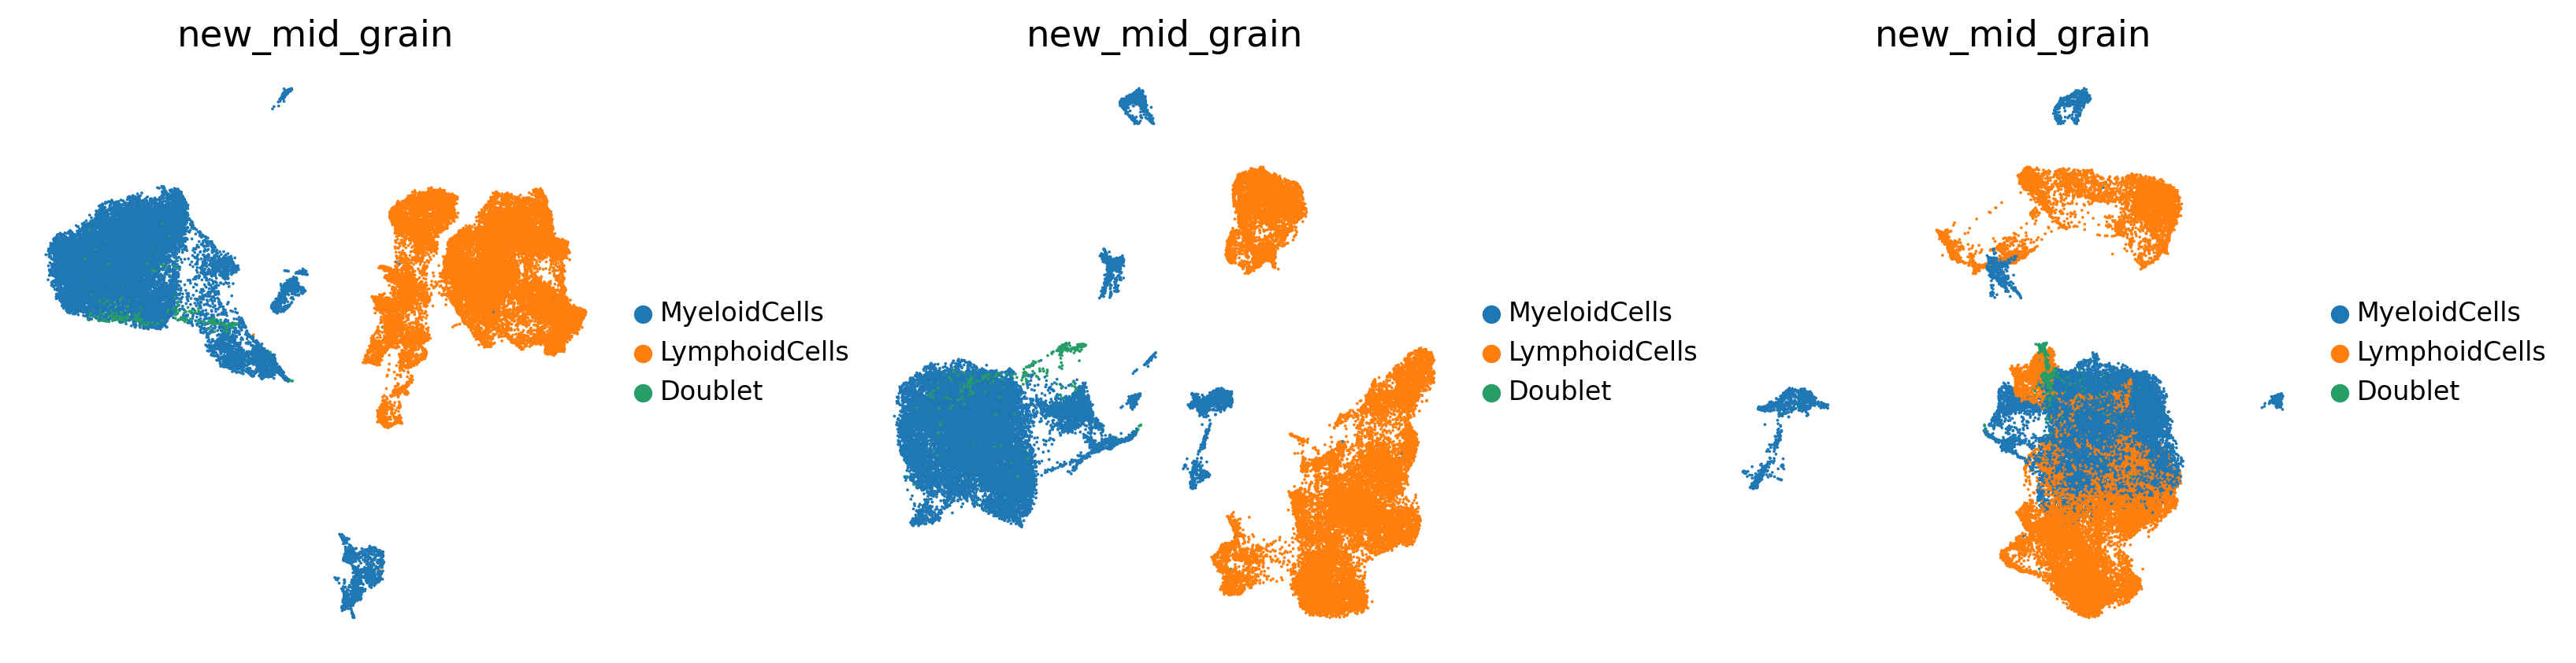

In [51]:
sc.pl.umap(adata, color=['new_mid_grain'], size=5, legend_fontsize=10, frameon=False, components='all', wspace=0.3)

In [32]:
adata.X.data[:10]

array([1., 2., 1., 1., 1., 2., 2., 5., 2., 2.], dtype=float32)

# Save

In [34]:
!ls /nfs/team205/heart/anndata_objects/Foetal/Immune

C97_index.csv
RNA_foetal_raw_immune_16Feb2023.h5ad
RNA_foetal_raw_Lymphoid_16Feb2023.h5ad
RNA_foetal_raw_Lymphoid_16Feb2023.obs.csv
RNA_foetal_raw_Myeloid_16Feb2023.h5ad
RNA_foetal_raw_Myeloid_16Feb2023.obs.csv


In [28]:
adata.write('/nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_immune_16Feb2023.h5ad')
adata

AnnData object with n_obs × n_vars = 41881 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', '_scvi_labels', '2Jan_coarse_grain', '2Jan_mid_grain', '2Jan_fine_grain', 'leiden_scVI', 'FACSgate', 'sex', 'week', 'trimester', 'cell_type2', 'new_fine_grain', 'new_mid_grain'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'cell

In [35]:
adata.obs

latent_RT_efficiency  \
barcode                                                                    
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1                            3.109560   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1                            3.181446   
BHF_F_Hea10402917_TACAGTGTCCAGTATG-1                            3.101654   
BHF_F_Hea10402917_ACCAGTATCCACTCCA-1                            3.109215   
BHF_F_Hea10402917_CAGCATATCCATGAAC-1                            3.094927   
...                                                                  ...   
HCAHeartST13386010_HCAHeartST13303420_GAGGCAAGT...              0.674450   
HCAHeartST13386010_HCAHeartST13303420_CTCACACTC...              0.652189   
HCAHeartST13386010_HCAHeartST13303420_AGGTTAGAG...              0.673068   
HCAHeartST13386010_HCAHeartST13303420_TTGGAGGCA...              0.599492   
HCAHeartST13386010_HCAHeartST13303420_TGTTCCTCA...              0.604425   

                                                    latent_cell_probability  \
barcode                                                                       
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1                               0.999991   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1                               0.999989   
BHF_F_Hea10402917_TACAGTGTCCAGTATG-1                               0.999993   
BHF_F_Hea10402917_ACCAGTATCCACTCCA-1                               0.999989   
BHF_F_Hea10402917_CAGCATATCCATGAAC-1                               0.999994   
...                                                                     ...   
HCAHeartST13386010_HCAHeartST13303420_GAGGCAAGT...                 0.999799   
HCAHeartST13386010_HCAHeartST13303420_CTCACACTC...                 0.999451   
HCAHeartST13386010_HCAHeartST13303420_AGGTTAGAG...                 0.999778   
HCAHeartST13386010_HCAHeartST13303420_TTGGAGGCA...                 0.999217   
HCAHeartST13386010_HCAHeartST13303420_TGTTCCTCA...                 0.999661   

                                                    latent_scale  \
barcode                                                            
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1                10201.502930   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1                10217.305664   
BHF_F_Hea10402917_TACAGTGTCCAGTATG-1                 9392.824219   
BHF_F_Hea10402917_ACCAGTATCCACTCCA-1                 9608.674805   
BHF_F_Hea10402917_CAGCATATCCATGAAC-1                 9954.063477   
...                                                          ...   
HCAHeartST13386010_HCAHeartST13303420_GAGGCAAGT...   7148.253418   
HCAHeartST13386010_HCAHeartST13303420_CTCACACTC...   7118.884277   
HCAHeartST13386010_HCAHeartST13303420_AGGTTAGAG...   6220.687500   
HCAHeartST13386010_HCAHeartST13303420_TTGGAGGCA...   7356.519531   
HCAHeartST13386010_HCAHeartST13303420_TGTTCCTCA...   6835.875000   

                                                              sangerID  \
barcode                                                                  
BHF_F_Hea10402917_ATGTGTGTCGAACGGA-1                 BHF_F_Hea10402917   
BHF_F_Hea10402917_CAGGTGCAGGCTATCT-1                 BHF_F_Hea10402917   
BHF_F_Hea10402917_TACAGTGTCCAGTATG-1                 BHF_F_Hea10402917   
BHF_F_Hea10402917_ACCAGTATCCACTCCA-1                 BHF_F_Hea10402917   
BHF_F_Hea10402917_CAGCATATCCATGAAC-1                 BHF_F_Hea10402917   
...                                                                ...   
HCAHeartST13386010_HCAHeartST13303420_GAGGCAAGT...  HCAHeartST13386010   
HCAHeartST13386010_HCAHeartST13303420_CTCACACTC...  HCAHeartST13386010   
HCAHeartST13386010_HCAHeartST13303420_AGGTTAGAG...  HCAHeartST13386010   
HCAHeartST13386010_HCAHeartST13303420_TTGGAGGCA...  HCAHeartST13386010   
HCAHeartST13386010_HCAHeartST13303420_TGTTCCTCA...  HCAHeartST13386010   

                                                                               combinedID  \
barcode                                                                                     
B

In [44]:
# save .obs
adata.obs.to_csv('/nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_immune_16Feb2023.obs.csv')

In [45]:
!ls -l  /nfs/team205/heart/anndata_objects/Foetal/Immune

total 1500548
-rw-r--r-- 1 20383 1403    264965 Feb 16 10:37 C97_index.csv
-rw-r--r-- 1 20383 1403 763332444 Feb 17 13:21 RNA_foetal_raw_immune_16Feb2023.h5ad
-rw-r--r-- 1 20383 1403  23704564 Feb 17 13:58 RNA_foetal_raw_immune_16Feb2023.obs.csv
-rw-r--r-- 1 20383 1403 369182732 Feb 17 12:59 RNA_foetal_raw_Lymphoid_16Feb2023.h5ad
-rw-r--r-- 1 20383 1403  12130193 Feb 17 13:15 RNA_foetal_raw_Lymphoid_16Feb2023.obs.csv
-rw-r--r-- 1 20383 1403 358041637 Feb 16 23:33 RNA_foetal_raw_Myeloid_16Feb2023.h5ad
-rw-r--r-- 1 20383 1403   9891132 Feb 16 23:33 RNA_foetal_raw_Myeloid_16Feb2023.obs.csv


In [ ]:
# rclone to gdrive
rclone copy /nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_immune_16Feb2023.h5ad \
gdrive:JamesC_Kazumasa/Foetal_Heart/SanjayShinha/toSinhalab/anndata/Immune_16Feb2023
    
rclone copy /nfs/team205/heart/anndata_objects/Foetal/Immune/C97_index.csv \
gdrive:JamesC_Kazumasa/Foetal_Heart/SanjayShinha/toSinhalab/anndata/Immune_16Feb2023

# Markers

In [4]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Immune/RNA_foetal_raw_immune_16Feb2023.h5ad')
adata

AnnData object with n_obs × n_vars = 41881 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', '_scvi_labels', '2Jan_coarse_grain', '2Jan_mid_grain', '2Jan_fine_grain', 'leiden_scVI', 'FACSgate', 'sex', 'week', 'trimester', 'cell_type2', 'new_fine_grain', 'new_mid_grain'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'cell

In [39]:
adata_lognorm = adata.copy()
sc.pp.normalize_total(adata_lognorm, target_sum=1e4)
sc.pp.log1p(adata_lognorm)

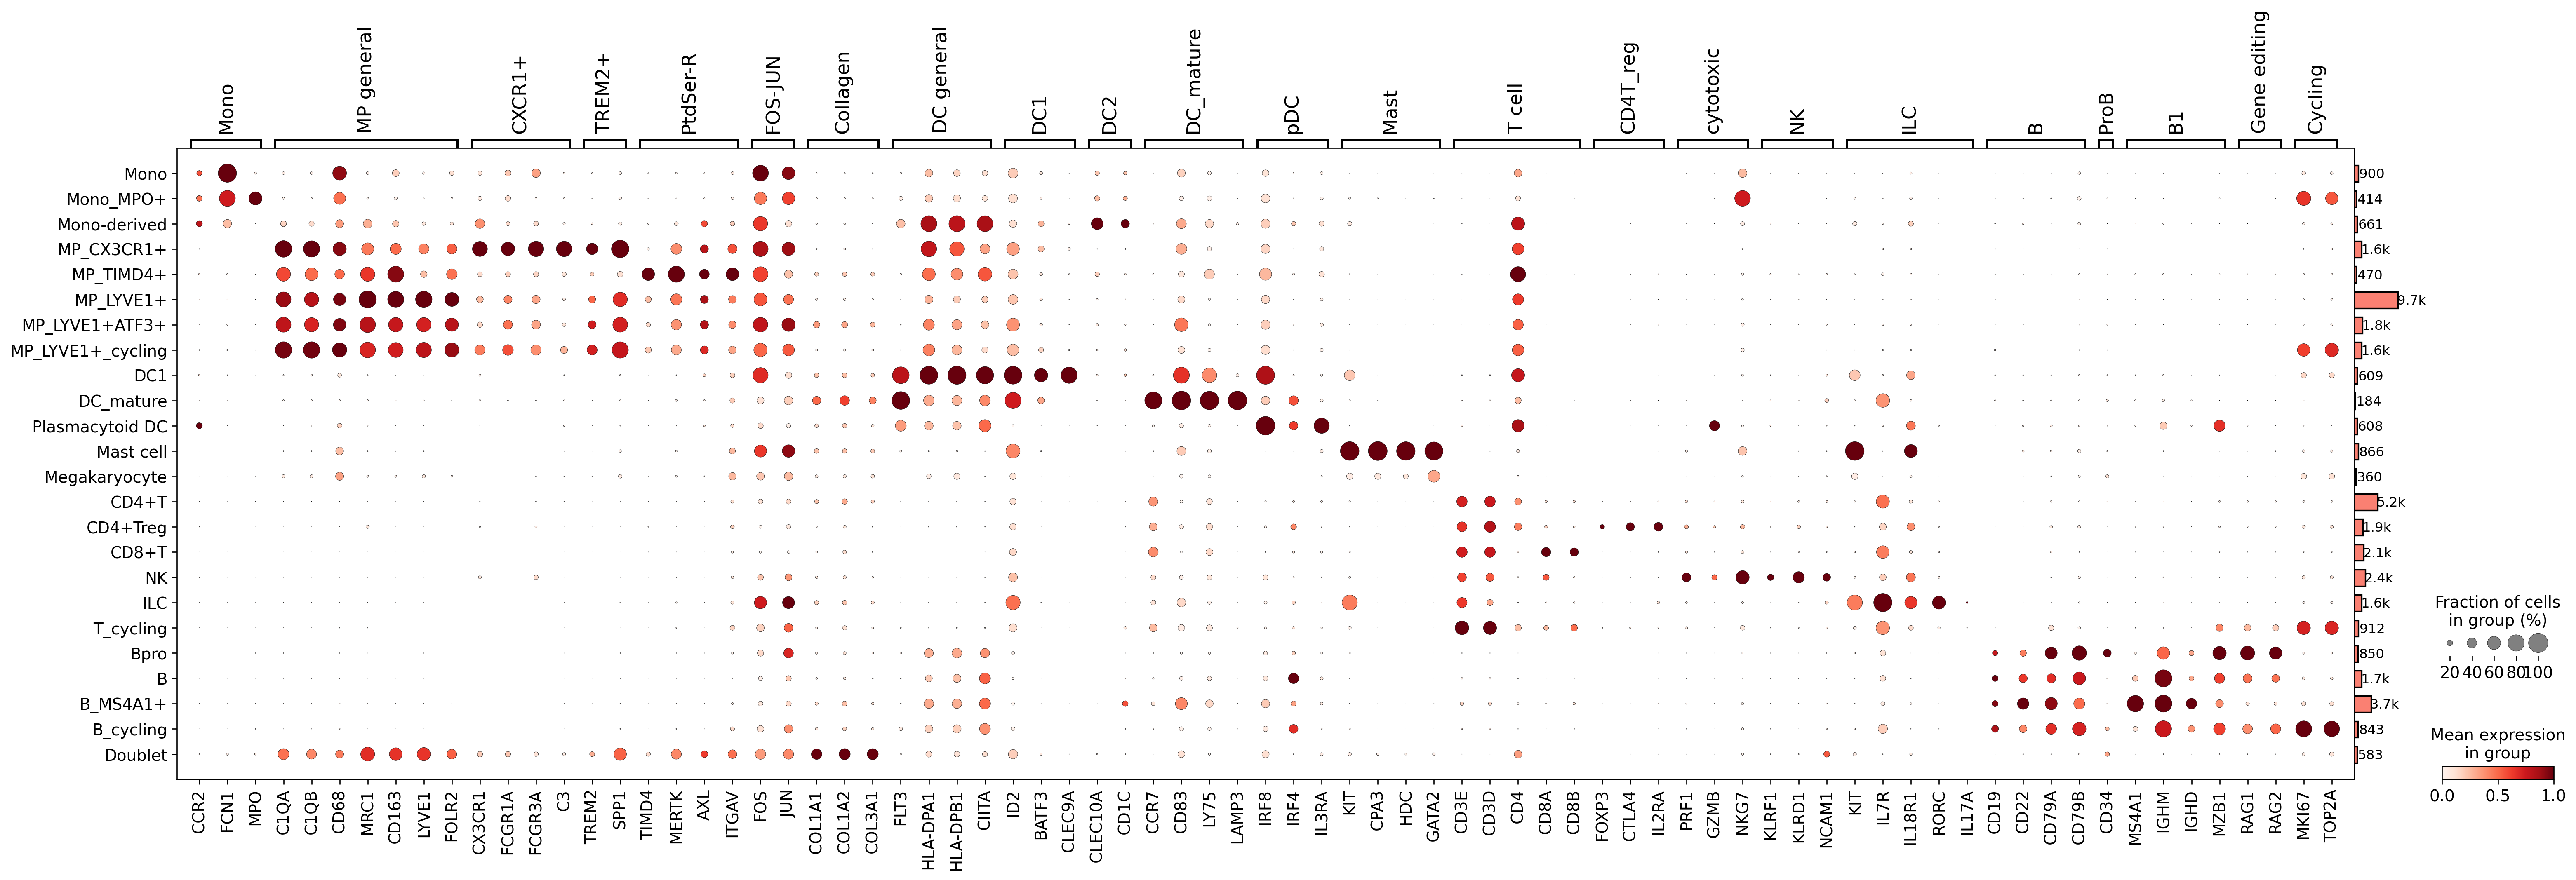

In [40]:
markers={
    'Mono':['CCR2','FCN1','MPO'],
    'MP general':['C1QA','C1QB','CD68','MRC1','CD163','LYVE1','FOLR2'],
    'CXCR1+':['CX3CR1','FCGR1A','FCGR3A','C3'],
    'TREM2+':['TREM2','SPP1'],
    'PtdSer-R':['TIMD4','MERTK','AXL','ITGAV'],
    'FOS-JUN':['FOS','JUN'],
    'Collagen':['COL1A1','COL1A2','COL3A1'],
    'DC general':['FLT3','HLA-DPA1','HLA-DPB1','CIITA'],
    'DC1':['ID2','BATF3','CLEC9A'],
    'DC2':['CLEC10A','CD1C'],
    'DC_mature':['CCR7','CD83', 'LY75','LAMP3'],
    'pDC':['IRF8','IRF4','IL3RA'],
      'Mast': ['KIT', 'CPA3','HDC','GATA2'],
    'T cell': ['CD3E', 'CD3D','CD4', 'CD8A', 'CD8B'],
    'CD4T_reg': ['FOXP3', 'CTLA4', 'IL2RA'],
    'cytotoxic': ['PRF1', 'GZMB','NKG7'],
    'NK': ['KLRF1', 'KLRD1','NCAM1',],
    'ILC': ['KIT', 'IL7R','IL18R1','RORC','IL17A'],   
    'B': ['CD19','CD20','CD22','CD79A', 'CD79B'],
     'ProB':['CD34'],
    'B1':['MS4A1','IGHM','IGHD','MZB1'],
    'Gene editing': ['RAG1','RAG2'],
    'Cycling':['MKI67','TOP2A'],
}

for key in markers.keys():
    markers[key]=[x for x in markers[key] if x in adata.var_names]

dp = sc.pl.dotplot(adata_lognorm,
              markers, 
              groupby='new_fine_grain',
              dendrogram=False,
              standard_scale="var",
              color_map="Reds",
              return_fig=True
              # swap_axes=True,
             )
dp.add_totals().show()

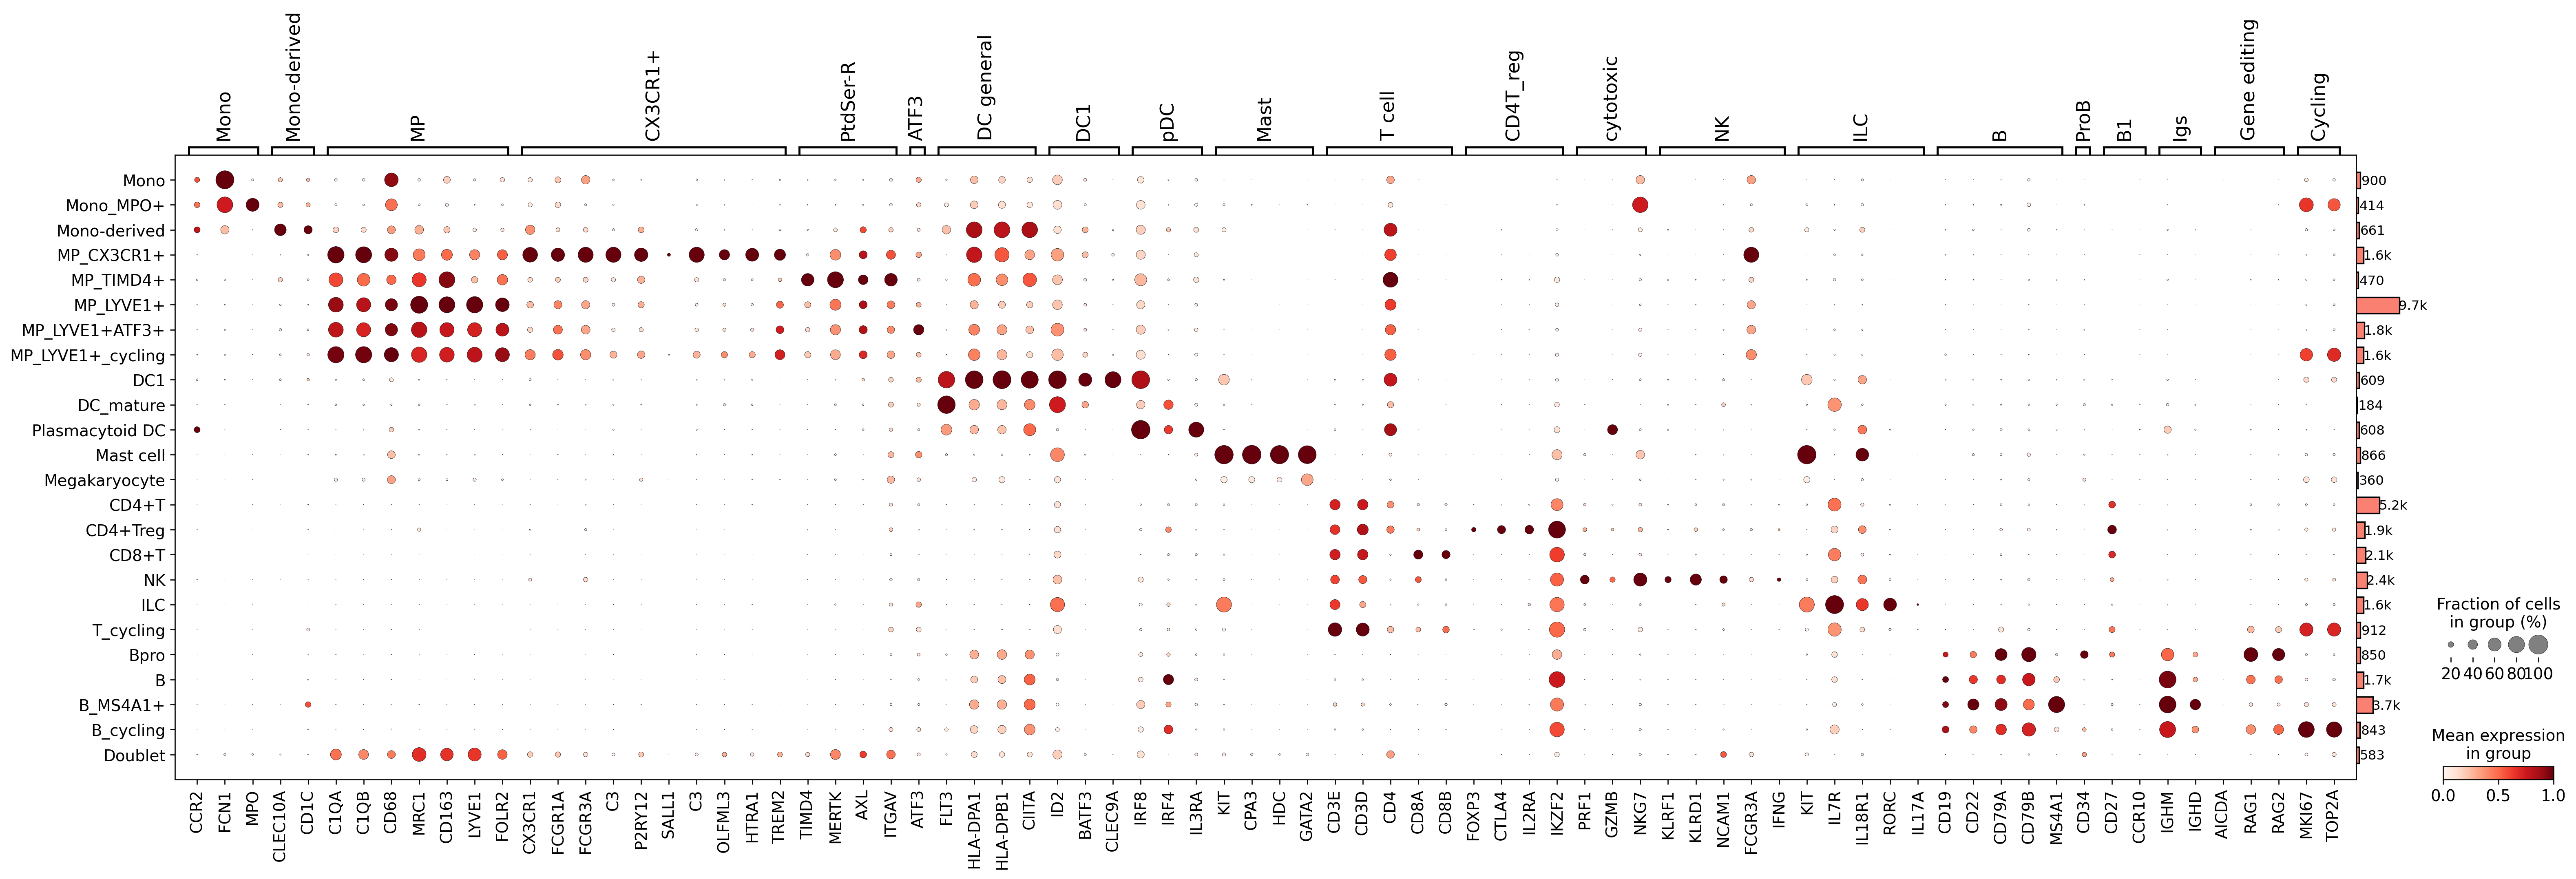

In [57]:
markers={
     'Mono':['CCR2','FCN1','MPO'],
    'Mono-derived':['CLEC10A','CD1C'],
    'MP':['C1QA','C1QB','CD68','MRC1','CD163','LYVE1','FOLR2'],
    'CX3CR1+':['CX3CR1','FCGR1A','FCGR3A','C3','P2RY12','SALL1','C3','OLFML3','HTRA1','TREM2',],
    'PtdSer-R':['TIMD4','MERTK','AXL','ITGAV'],
    'ATF3':['ATF3'],
    'DC general':['FLT3','HLA-DPA1','HLA-DPB1','CIITA'],
    'DC1':['ID2','BATF3','CLEC9A'],
    'pDC':['IRF8','IRF4','IL3RA'],
    'Mast': ['KIT', 'CPA3','HDC','GATA2'],
  
    
    'T cell': ['CD3E', 'CD3D','CD4', 'CD8A', 'CD8B'],
    'CD4T_reg': ['FOXP3', 'CTLA4', 'IL2RA', 'IKZF2'],
    'cytotoxic': ['PRF1', 'GZMB','NKG7'],
    'NK': ['KLRF1', 'KLRD1','NCAM1','FCGR3A','IFNG'],
    'ILC': ['KIT', 'IL7R','IL18R1','RORC','IL17A'],   
    'B': ['CD19','CD20','CD22','CD79A', 'CD79B','MS4A1'],
     'ProB':['CD34'],
    'B1':['CD27','CCR10'],
    'Igs':['IGHM','IGHD'],
    'Gene editing': ['AICDA', 'RAG1','RAG2'],
    'Cycling':['MKI67','TOP2A'],
}

for key in markers.keys():
    markers[key]=[x for x in markers[key] if x in adata.var_names]

dp = sc.pl.dotplot(adata_lognorm,
              markers, 
              groupby='new_fine_grain',
              dendrogram=False,
              standard_scale="var",
              color_map="Reds",
              return_fig=True
              # swap_axes=True,
             )
dp.add_totals().show()

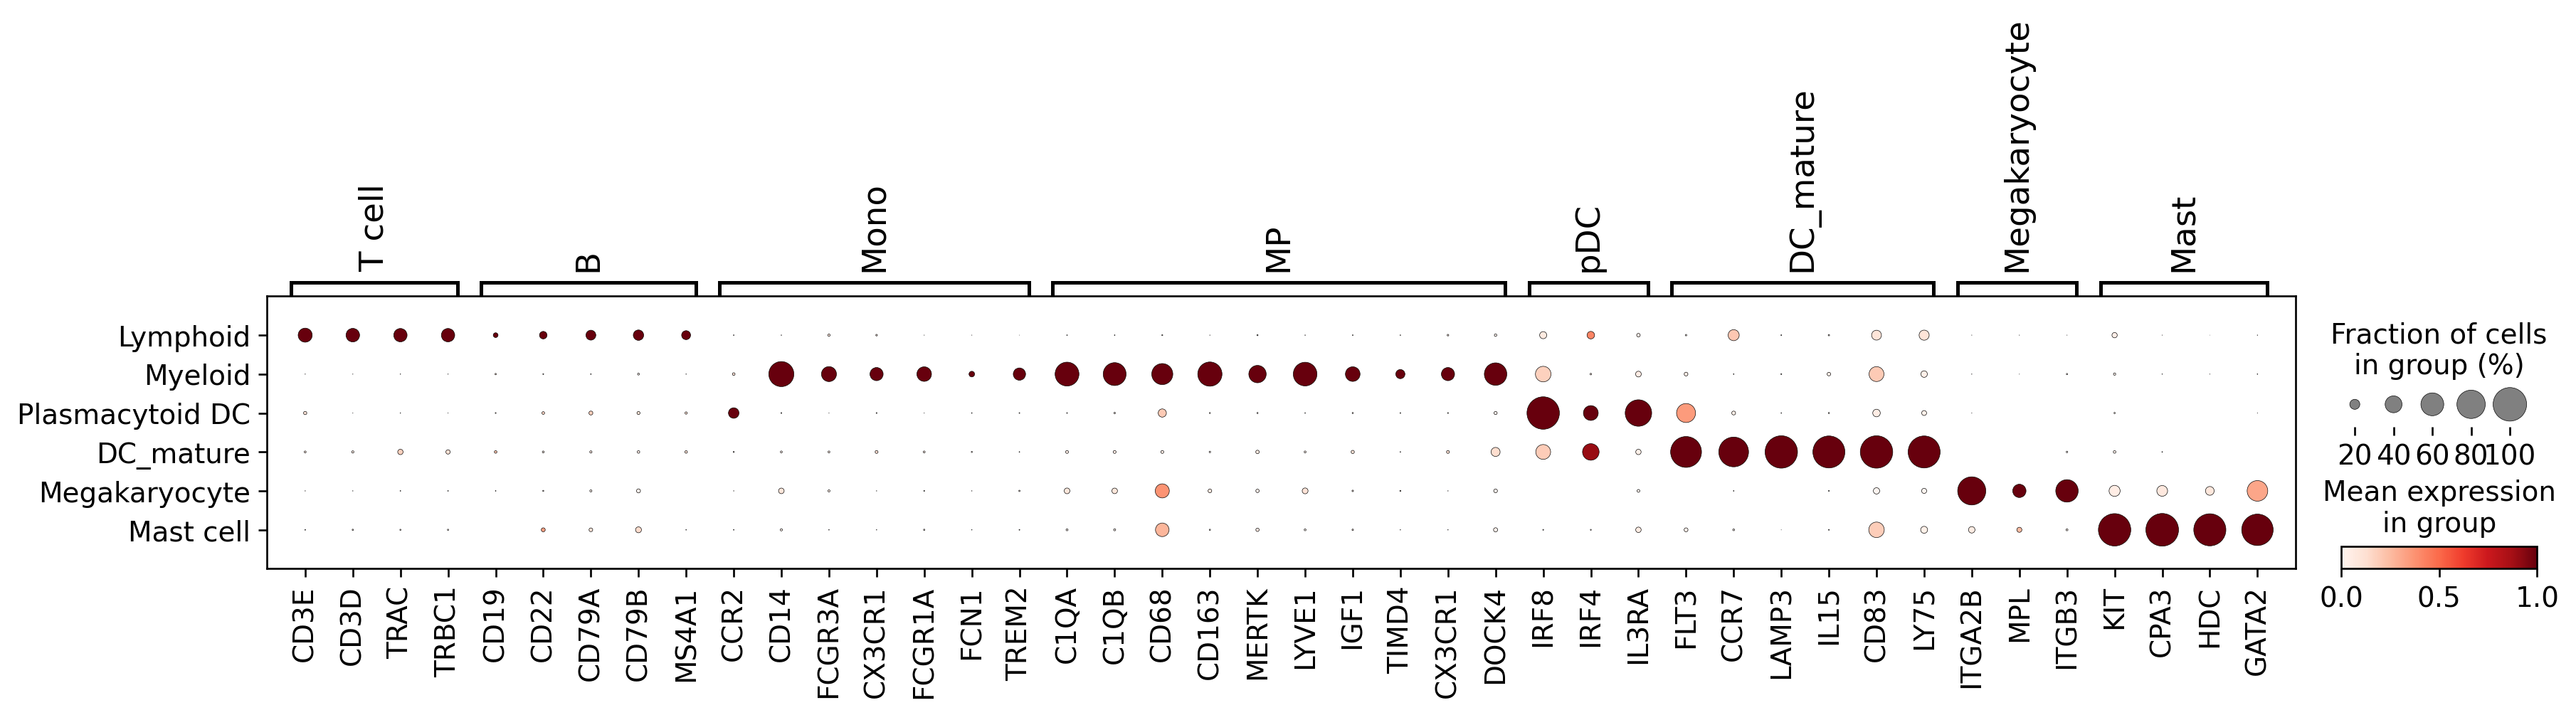

In [48]:
markers={
     'T cell': ['CD3E', 'CD3D','TRAC','TRBC1',],
     'B': ['CD19','CD20','CD22','CD79A', 'CD79B','MS4A1'],
   
    
    'Mono':['CCR2','CD14','FCGR3A','CX3CR1','FCGR1A','FCN1','TREM2'],
    'MP':['C1QA','C1QB','CD68','CD163','MERTK','LYVE1','IGF1','TIMD4','CX3CR1','DOCK4'],
    'pDC':['IRF8','IRF4','IL3RA'],
     'DC_mature':['FLT3', 'CCR7','LAMP3', 'IL15', 'CD83', 'LY75', ],
    'Megakaryocyte':['ITGA2B','MPL','ITGB3',],
    'Mast': ['KIT', 'CPA3','HDC','GATA2'],
}


for key in markers.keys():
    markers[key]=[x for x in markers[key] if x in adata.var_names]

sc.pl.dotplot(adata_lognorm,
              markers, 
              groupby='cell_type2',
              dendrogram=False,
              standard_scale="var",
              color_map="Reds",
              # swap_axes=True,
             )